In [48]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

import numpy as np

## Note to Alex
Right now I am struggling with just plotting the data, using the correct long/lat ranges for the UK.

When I plot the global daily temperature it is fine because the long/lat limits are for the whole world by default, however when I plot the UK temperature variation the long/lat limits are set to (-180, 180, -90, 90). I was about to run through [this example](https://scitools.org.uk/iris/docs/latest/examples/General/projections_and_annotations.html) when I decided to go for a run. 

Ultimately, we want to aggregate the data, possibly by covid-19 reporting regio

In [13]:
file_path = r"C:\Users\Chris\Downloads\ukv_daily_t1o5m_max_20200101.nc"
#file_path = r"C:\Users\Chris\Downloads\global_daily_t1o5m_max_20200101"

In [26]:
temperature = iris.load_cube(file_path, 'air_temperature')
temperature

<iris 'Cube' of air_temperature / (K) (grid_latitude: 808; grid_longitude: 621)>

In [66]:
temperature = iris.load_cube(r"C:\Users\Chris\Downloads\global_daily_t1o5m_max_20200101.nc", 'air_temperature')
temperature

<iris 'Cube' of air_temperature / (K) (latitude: 1920; longitude: 2560)>

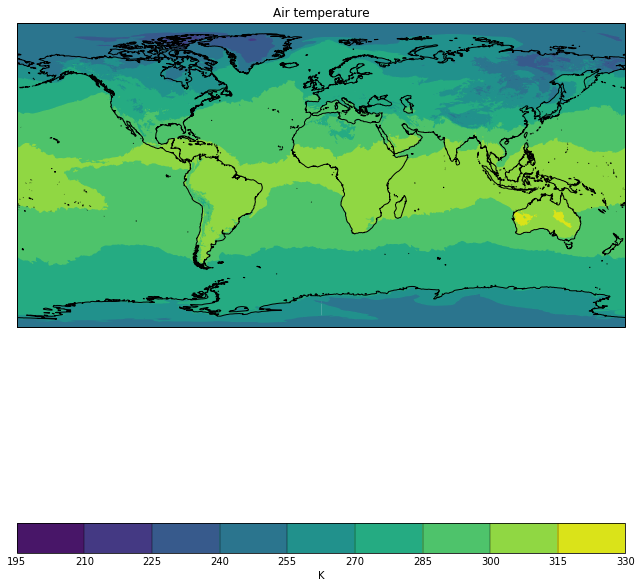

In [67]:
nlevels = 15

# Plot #1: contourf with axes longitude from -180 to 180
plt.figure(figsize=(24, 24))
plt.subplot(121)
hPlot = qplt.contourf(temperature) #, nlevels)
h = plt.gca()
h.coastlines('50m')

In [61]:
h.get_extent()
h.set_extent((-5, 10, 50, 60))

In [68]:
h.get_extent()

(-180.0, 180.0, -89.953125, 89.953125)

In [63]:
plt.show()

In [36]:
print(temperature.units)

K


In [54]:
lat  = temperature.coords("grid_latitude")
long = temperature.coords("grid_longitude")

In [55]:
print(np.min(long))

DimCoord(array([354.94247437, 354.95597437, 354.96947437, 354.98297437,
       354.99647437, 355.00997437, 355.02347437, 355.03697437,
       355.05047437, 355.06397437, 355.07747437, 355.09097437,
       355.10447437, 355.11797437, 355.13147437, 355.14497437,
       355.15847437, 355.17197437, 355.18547437, 355.19897437,
       355.21247437, 355.22597437, 355.23947437, 355.25297437,
       355.26647437, 355.27997437, 355.29347437, 355.30697437,
       355.32047438, 355.33397438, 355.34747438, 355.36097438,
       355.37447438, 355.38797438, 355.40147438, 355.41497438,
       355.42847438, 355.44197438, 355.45547438, 355.46897438,
       355.48247438, 355.49597438, 355.50947438, 355.52297438,
       355.53647438, 355.54997438, 355.56347438, 355.57697438,
       355.59047438, 355.60397438, 355.61747438, 355.63097438,
       355.64447438, 355.65797438, 355.67147438, 355.68497438,
       355.69847438, 355.71197439, 355.72547439, 355.73897439,
       355.75247439, 355.76597439, 355.7794743

In [56]:
print(np.min(lat))

DimCoord(array([-3.7572000e+00, -3.7437000e+00, -3.7302001e+00, -3.7167001e+00,
       -3.7032001e+00, -3.6896999e+00, -3.6761999e+00, -3.6626999e+00,
       -3.6492000e+00, -3.6357000e+00, -3.6222000e+00, -3.6087000e+00,
       -3.5952001e+00, -3.5817001e+00, -3.5682001e+00, -3.5546999e+00,
       -3.5411999e+00, -3.5276999e+00, -3.5142000e+00, -3.5007000e+00,
       -3.4872000e+00, -3.4737000e+00, -3.4602001e+00, -3.4467001e+00,
       -3.4331999e+00, -3.4196999e+00, -3.4061999e+00, -3.3927000e+00,
       -3.3792000e+00, -3.3657000e+00, -3.3522000e+00, -3.3387001e+00,
       -3.3252001e+00, -3.3116999e+00, -3.2981999e+00, -3.2846999e+00,
       -3.2711999e+00, -3.2577000e+00, -3.2442000e+00, -3.2307000e+00,
       -3.2172000e+00, -3.2037001e+00, -3.1901999e+00, -3.1767001e+00,
       -3.1631999e+00, -3.1496999e+00, -3.1362000e+00, -3.1227000e+00,
       -3.1092000e+00, -3.0957000e+00, -3.0822001e+00, -3.0686998e+00,
       -3.0552001e+00, -3.0416999e+00, -3.0281999e+00, -3.0146999e+0

In [52]:
for coord in temperature.coords():
    print(coord.name())

grid_latitude
grid_longitude
forecast_period
forecast_reference_time
height
time


In [65]:
temperature[0: 4].coords("grid_latitude")

[DimCoord(array([-3.7572, -3.7437, -3.7302, -3.7167], dtype=float32), standard_name='grid_latitude', units=Unit('degrees'), var_name='grid_latitude', coord_system=RotatedGeogCS(37.5, 177.5, ellipsoid=GeogCS(6371229.0)))]